In [1]:
import numpy as np
import pandas as pd
import pyodbc
import sqlalchemy
import sqlite3
from subprocess import check_output
import os
from IPython.core.display import Image, display

from sqlalchemy import create_engine
engine = create_engine('sqlite:////...', echo=False)

## 1. All about joins
### [Course](https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/tree/master/SQL%20practices/Track:%20SQL%20for%20Database%20Administrators/Course%204:%20Improving%20Query%20Performance%20in%20PostgreSQL) overview
- `Query structure`, including `joins`, `sub-queries` and `temporary tables`.
- Limitting & aggregating data.
- Database storage properties & optimization tools.
- Query planning & excution.

### Query planer.
Imaging that you are in the restaurant (look at the following picture)

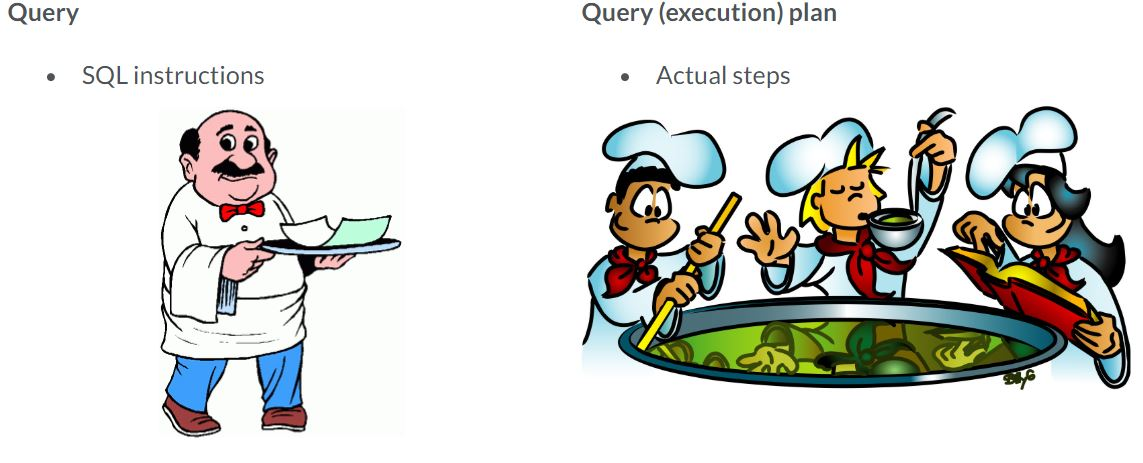

In [2]:
## hidden

- Your order is a **`query- SQL instruction`**; the [waiter](https://www.google.com.vn/search?tbm=isch&q=waiter#imgrc=F7CJO7FSS6hlcM) take the request to the kitchen; 
- Then the [cook(chef)](https://www.google.com.vn/search?q=chef&tbm=isch&ved=2ahUKEwi_45a7tI3sAhUcx4sBHWAlAoMQ2-cCegQIABAA&oq=chef&gs_lcp=CgNpbWcQAzIHCAAQsQMQQzICCAAyAggAMgIIADIECAAQQzICCAAyAggAMgIIADICCAAyAggAOgUIABCxA1D73gdYxOgHYPDsB2gAcAB4AIABbogBsgOSAQMwLjSYAQCgAQGqAQtnd3Mtd2l6LWltZ7ABAMABAQ&sclient=img&ei=OahyX__iF5yOr7wP4MqImAg#imgrc=GN3ORQx0f5OkfM) determine **how to best executed** through the **`actual step`**, they transform your order/request to the meal.

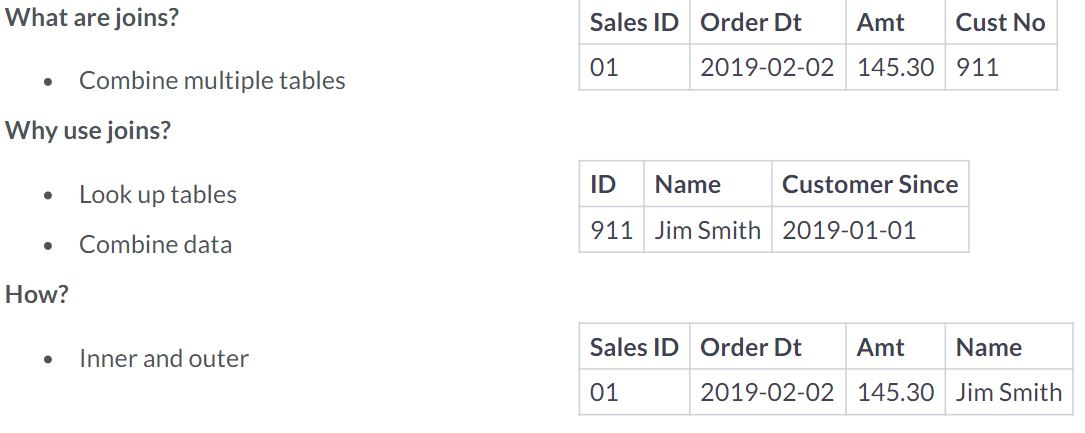

In [3]:
## hidden

### INNER JOIN.

This query joins the table based on the **`common column`** but the `common column` is duplicated in the output, such as `country` column in the following figure!

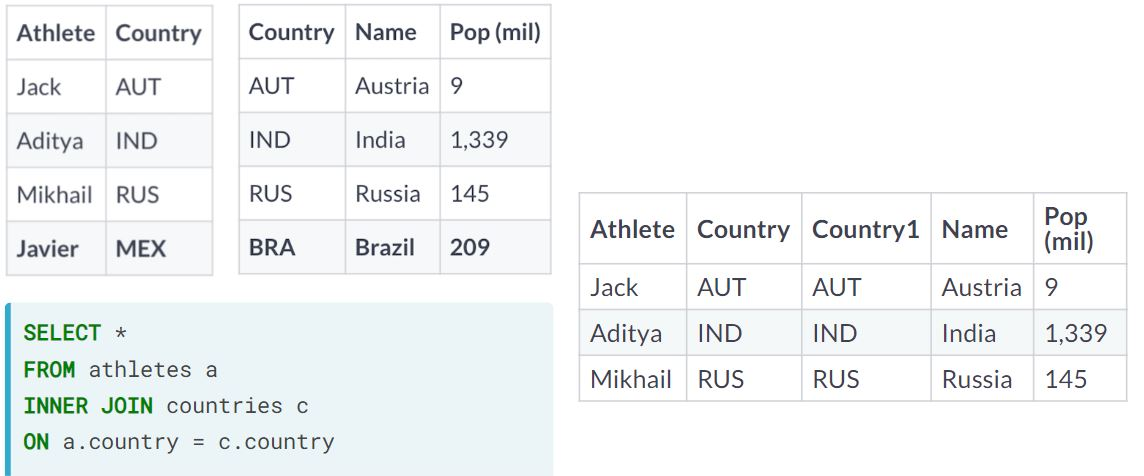

In [4]:
## hidden

Beside that, we can use the **`USING(column_condition)`** command instead of **`ON ...`**! Hence, the `country` column in the `final table` only returns one-time!

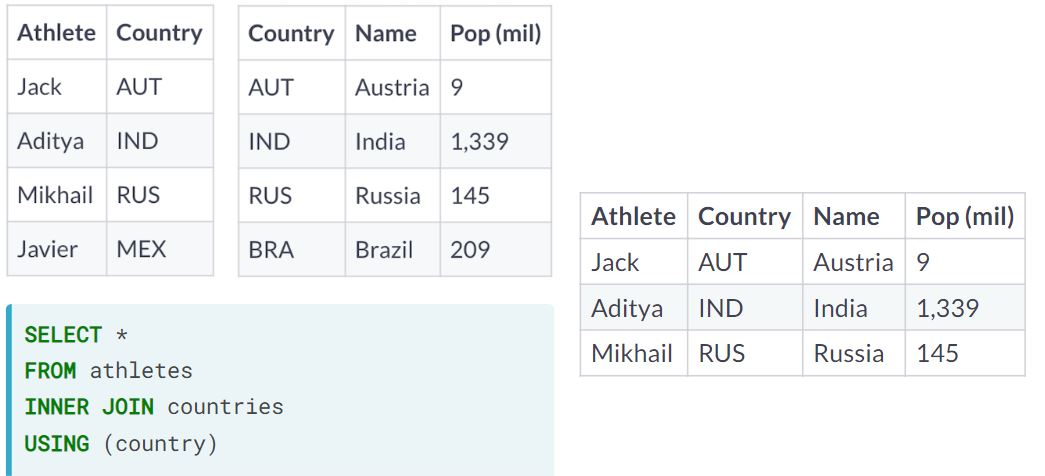

In [5]:
## hidden

### `LEFT JOIN` or Left outer join.
- In this command, we joins the table to the **left** without ommiting the **not** `common values` of the `left-table` based on the `common column`!
- In the example below, the `"MEX (Mexico)"` in the `common column: country` of the "left (table)" is remained while the `"BRA (Brazil)"` in the "right-table" is ommited!

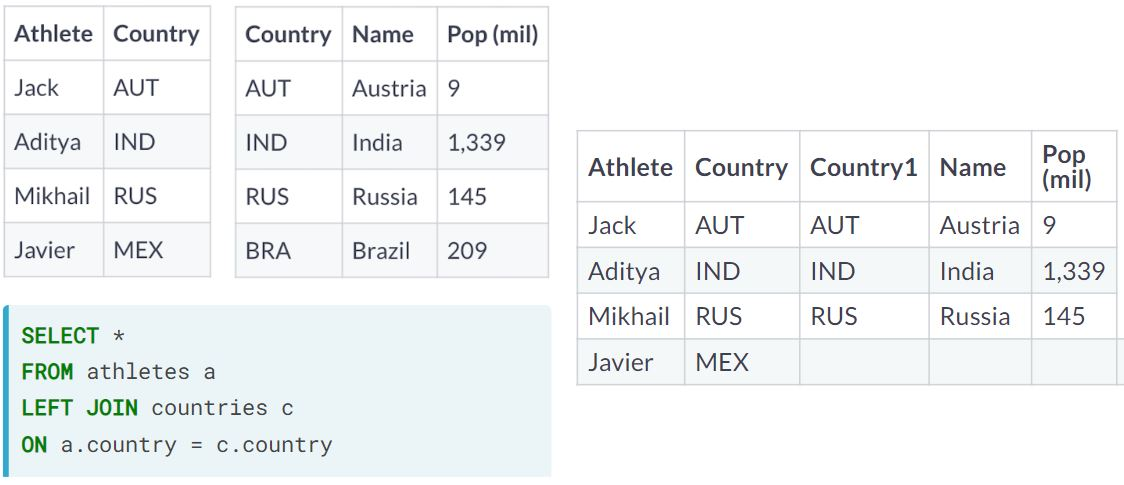

In [6]:
## hidden

### `RIGHT JOIN` or Right outer join.
- In this command, we joins the table to the **right** without ommiting the **not** `common values` of the `left-table` based on the `common column`!
- In the example below, the `"MEX (Mexico)"` in the `common column: country` of the "left (table)" is omittied while the `"BRA (Brazil)"` in the "right-table" is still remained!

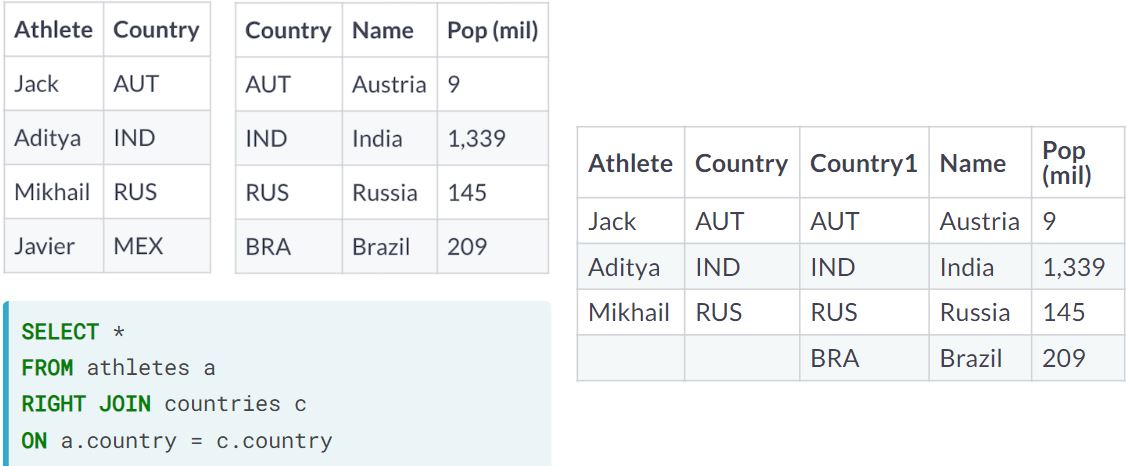

In [7]:
## hidden

### FULL OUTER JOIN.
This command will return all `discreate values` from both tables.

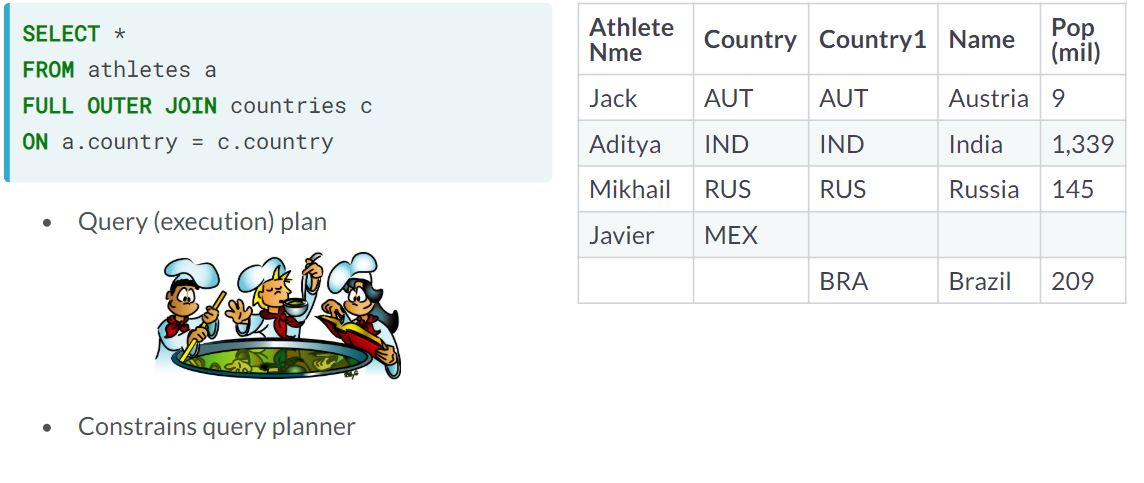

In [8]:
## hidden

### EXERCISEs.
#### Exercise 1.1. Where are all the athletes from
The Olympics occurs every two years (Summer & Winter) and is an event that people worldwide watch. It sparks national pride as people root for athletes representing their own country. In this exercise, you will be looking at recent Olympic athletes data (2014 and 2016) to find which countries participated. You will need to join it to regional information that lists all countries who have ever participated in prior Olympics.

**`athletes`**

id|athlete_id|name|sex|age|height|weight|country_code|games|year|season|city|sport|event|medal
-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|
30000|869|Gabrielle Marie Adcock|F|25|167|null|GBR|2016 Summer|2016|Summer|Rio de Janeiro|Badminton|Badminton Mixed Doubles|null
30001|22|Andreea Aanei|F|22|170|125|ROU|2016 Summer|2016|Summer|Rio de Janeiro|Weightlifting|Weightlifting Womens Super Heavyweight|null
30002|51|Nstor Abad Sanjun|M|23|167|64|ESP|2016 Summer|2016|Summer|Rio de Janeiro|Gymnastics|Gymnastics Mens Individual All Around|null
...|...|...|...|...|...|...|...|...|...|...|...|...|...|...
48576|135500|Kristaps Zvejnieks|M|21|185|87|LAT|2014 Winter|2014|Winter|Sochi|Alpine Skiing|Alpine Skiing Mens Slalom|null
48577|135570|Piotr ya|M|27|176|59|POL|2014 Winter|2014|Winter|Sochi|Ski Jumping|Ski Jumping Mens Large Hill Individual|null
48578|135570|Piotr ya|M|27|176|59|POL|2014 Winter|2014|Winter|Sochi|Ski Jumping|Ski Jumping Mens Large Hill Team|null

Here, you will join together the `athletes` and `oregions` tables to return countries with participating athletes.

**`oregions`**

olympic_cc|country|region|notes
-|-|-|-|
AFG|Afghanistan|Asia|null
AHO|Curacao|North America|Netherlands Antilles
ALB|Albania|Europe|null
...|...|...|...|
YEM|Yemen|Asia|null
ZAM|Zambia|Africa|null
ZIM|Zimbabwe|Africa|null

Feel free to explore the data to see if you recognize any of the athletes from your own country.

#### Instructions
- Join `athletes` to `oregions` using the `country code`.
- Alias each table. Use `ath` for athletes and `reg` for `oregions`.
- Check if you have any countries with `no athletes`.

**SOLUTION.**

                            -- Athlete count by country and region
                            SELECT reg.region,
                                   reg.country,
                                   COUNT(DISTINCT ath.athlete_id) AS no_athletes -- Athletes can compete in multiple events
                            FROM athletes AS ath
                            INNER JOIN oregions AS reg
                              ON reg.olympic_cc = ath.country_code
                            GROUP BY reg.region, reg.country
                            ORDER BY no_athletes;
**query result.**

region|country|no_athletes
:-|:-|:-:
Africa|Equatorial Guinea|1
Australia and Oceania|Tuvalu|1
Asia|Bhutan|2
Africa|Somalia|2
Africa|Chad|2
...|...|...
Europe|Russia|497
Europe|France|499
North America|Canada|526
Europe|Germany|569
North America|USA|777

**Comments.** Did you notice how the inner join excluded countries with no competing athletes, so the number of athletes was never 0.

#### Exercise 1.2. Using different joins to explore athletes' regions
You probably know about the Olympians from your country. Many Russians watch figure skating. Kenyans have a strong presence in running events. Canadians dominate hockey. Do these trends hold true across regions? Do all European countries have figure skating Olympians? Do all North Americans have Olympic-level hockey teams?

See which European countries sent figure skating competitors to the 2014 Winter Olympics. The athletes table is already filtered to figure skating `athletes`, and the `regions` table is filtered to European countries. Use the different join types and compare the results.

#### Instructions
**Step 1.** Use `regions`, `athletes`, and a `LEFT JOIN` to keep all the `regions`, even those with `no competing athletes`.

**SOLUTION.**

                    SELECT reg.region, reg.country,
                           COUNT(DISTINCT ath.athlete_id) AS no_athletes
                    FROM regions reg
                    LEFT JOIN athletes ath
                      ON reg.olympic_cc = ath.country_code
                    GROUP BY reg.region, reg.country
                    ORDER BY no_athletes DESC;

**query result.**

region|country|no_athletes
:-|:-|:-:
Europe|Russia|15
Europe|Italy|11
Europe|Germany|10
Europe|France|9
Europe|Ukraine|6
Europe|UK|6
Europe|Austria|4
Europe|Spain|4
Europe|Czech Republic|3
Europe|Lithuania|2
Europe|Estonia|2
Europe|Sweden|2
Europe|Belgium|1
Europe|Norway|1
Europe|Slovakia|1
Europe|Romania|1
Europe|Luxembourg|0
Europe|Macedonia|0
Europe|Malta|0
Europe|Albania|0
Europe|Monaco|0
Europe|Montenegro|0
Europe|Netherlands|0
Europe|Poland|0
Europe|Portugal|0
Europe|San Marino|0
Europe|Serbia|0
Europe|Slovenia|0
Europe|Switzerland|0
Europe|Moldova|0
Europe|Andorra|0
Europe|Belarus|0
Europe|Bosnia and Herzegovina|0
Europe|Bulgaria|0
Europe|Croatia|0
Europe|Cyprus|0
Europe|Denmark|0
Europe|Finland|0
Europe|Greece|0
Europe|Hungary|0
Europe|Iceland|0
Europe|Ireland|0
Europe|Kosovo|0
Europe|Latvia|0
Europe|Liechtenstein|0

**Step 2.** Now use a `RIGHT JOIN` to keep all the `regions`, even those with `no competing athletes`.

**SOLUTION**

                    SELECT reg.region, reg.country,
                           COUNT(DISTINCT ath.athlete_id) AS no_athletes
                    FROM athletes ath
                    RIGHT JOIN regions AS reg
                      ON reg.olympic_cc = ath.country_code
                    GROUP BY reg.region, reg.country
                    ORDER BY no_athletes DESC;
**query result.**

region|country|no_athletes
:-|:-|:-:
Europe|Russia|15
Europe|Italy|11
Europe|Germany|10
Europe|France|9
Europe|Ukraine|6
Europe|UK|6
Europe|Austria|4
Europe|Spain|4
Europe|Czech Republic|3
Europe|Lithuania|2
Europe|Estonia|2
Europe|Sweden|2
Europe|Belgium|1
Europe|Norway|1
Europe|Slovakia|1
Europe|Romania|1
Europe|Luxembourg|0
Europe|Macedonia|0
Europe|Malta|0
Europe|Albania|0
Europe|Monaco|0
Europe|Montenegro|0
Europe|Netherlands|0
Europe|Poland|0
Europe|Portugal|0
Europe|San Marino|0
Europe|Serbia|0
Europe|Slovenia|0
Europe|Switzerland|0
Europe|Moldova|0
Europe|Andorra|0
Europe|Belarus|0
Europe|Bosnia and Herzegovina|0
Europe|Bulgaria|0
Europe|Croatia|0
Europe|Cyprus|0
Europe|Denmark|0
Europe|Finland|0
Europe|Greece|0
Europe|Hungary|0
Europe|Iceland|0
Europe|Ireland|0
Europe|Kosovo|0
Europe|Latvia|0
Europe|Liechtenstein|0

**Step 3.** Use an `INNER JOIN` to find only `countries` with `competing athletes`.

**SOLUTION**

                    SELECT reg.region, reg.country,
                           COUNT(DISTINCT ath.athlete_id) AS no_athletes
                    FROM athletes ath
                    INNER JOIN regions AS reg
                      ON reg.olympic_cc = ath.country_code
                    GROUP BY reg.region, reg.country
                    ORDER BY no_athletes DESC;

**query result.**

region|country|no_athletes
:-|:-|:-:
Europe|Russia|15
Europe|Italy|11
Europe|Germany|10
Europe|France|9
Europe|Ukraine|6
Europe|UK|6
Europe|Austria|4
Europe|Spain|4
Europe|Czech Republic|3
Europe|Estonia|2
Europe|Sweden|2
Europe|Lithuania|2
Europe|Belgium|1
Europe|Romania|1
Europe|Slovakia|1
Europe|Norway|1

**Comments.** Using `INNER JOIN` only counted the `countries` with **at least one competing athlete**. It seems Russia, and not all of Europe, is the figure skating champion.

#### Exercise 1.3. What about the weather
Regionally, Africa has a reputation for dominating in the field of running. However, Africa has the fewest athletes per (competing) country. Why?

Running events are only found in the Summer Olympics, so maybe Africa does not send many athletes to the Winter Games. This would explain the low number of athletes when looking across all Olympic Games.

Explore that hypothesis by looking at athlete counts by season (Summer versus Winter).

#### Instructions
- Add the `season` field from the athletes table to the `SELECT` statement.
- Choose the `join` type to return only countries with competing `athletes`.
- Sort by `region` and `athletes_per_country` to see if there is a difference between the summer and `Winter Olympics`.

**SOLUTION.**

                    SELECT reg.region,
                           ath.season,
                           COUNT(DISTINCT ath.athlete_id) AS no_athletes,
                           COUNT(DISTINCT reg.olympic_cc) AS no_countries,
                           COUNT(DISTINCT ath.athlete_id)/COUNT(DISTINCT reg.olympic_cc) AS athletes_per_country
                    FROM athletes ath
                    INNER JOIN oregions reg
                        ON ath.country_code = reg.olympic_cc
                    GROUP BY reg.region, ath.season -- Group by region and season
                    ORDER BY reg.region , athletes_per_country;
**query result.**

region|season|no_athletes|no_countries|athletes_per_country
:-|:-|:-:|:-:|:-:|
Africa|Winter|5|3|1
Africa|Summer|990|54|18
Asia|Winter|338|22|15
Asia|Summer|2138|47|45
Australia and Oceania|Winter|76|4|19
Australia and Oceania|Summer|740|18|41
Europe|Winter|1847|44|41
Europe|Summer|4779|45|106
North America|Summer|1448|29|49
North America|Winter|447|9|49
South America|Winter|31|6|5
South America|Summer|1065|12|88

**Comments.**  `Africa` does indeed send few athletes to the Winter Olympics, which is why it's overall (Winter + Summer) athletes count is low.

## 2. Subqueries and common table expressions (cte)
### 2.1. Subqueries.
**What?** A `subquery` is a `simple-query` or used in joining alternative.

**How?** It often appears in the **`SELECT, FROM`** or **`WHERE`** `clause`

**Why?** Because it can return `one-result`; it is readable and `SQL instructions` similar to joins.

#### 2.1.1. `SELECT` `sub-query`
First, look at the following tables: The table on the left is the `words` in `movie-scripts` and its length; while in the right is in the `English words`.

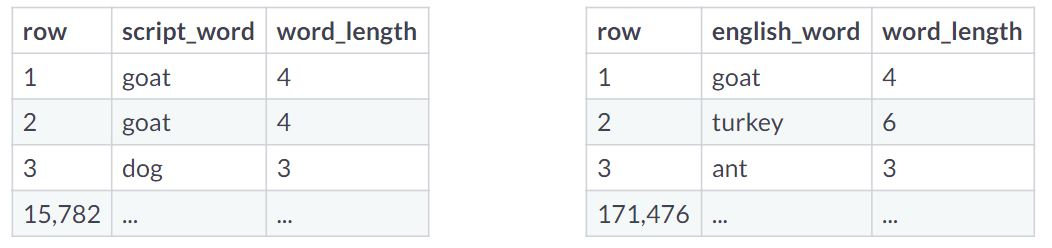

In [9]:
## hidden

Then, using `SELECT` sub-`query` to find out the `average word_length` in each table.

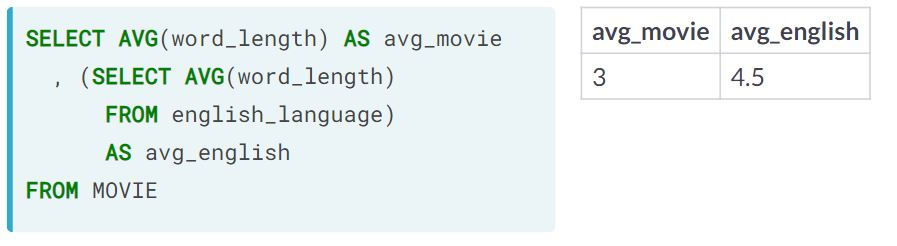

In [10]:
## hidden

#### 2.1.2 `WHERE` sub-`query`
For example, calculate the `average word_length` in the `english_language` table; which conditional on the `word is distinct from the movie`

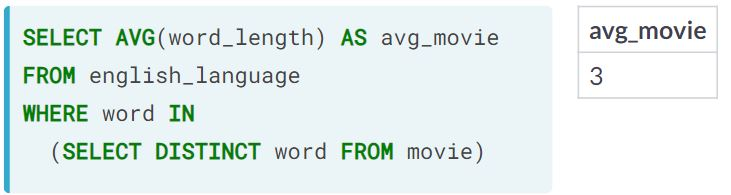

In [11]:
## hidden

#### 2.1.3. `FROM` sub-`query`

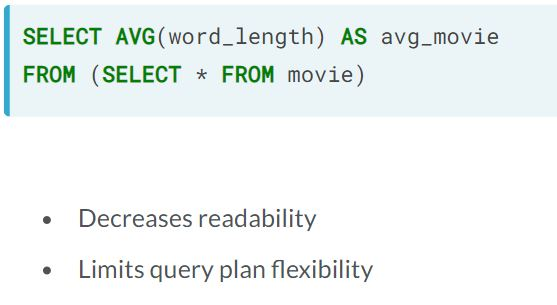

In [12]:
Image(r"C:\Users\Admin\Desktop\fig11.JPG", width = 350, height = 550)

### 2.2. About the `common table expression (CTEs)`
- **What?** The `CTE` is a stand-alone `query` with temporary result set; and **join alternative**.
- **How?** Using **`WITH`** `statement`.
- **Why?** Can return one - result; readable; and creates a temporary table.

#### CTEs structure.

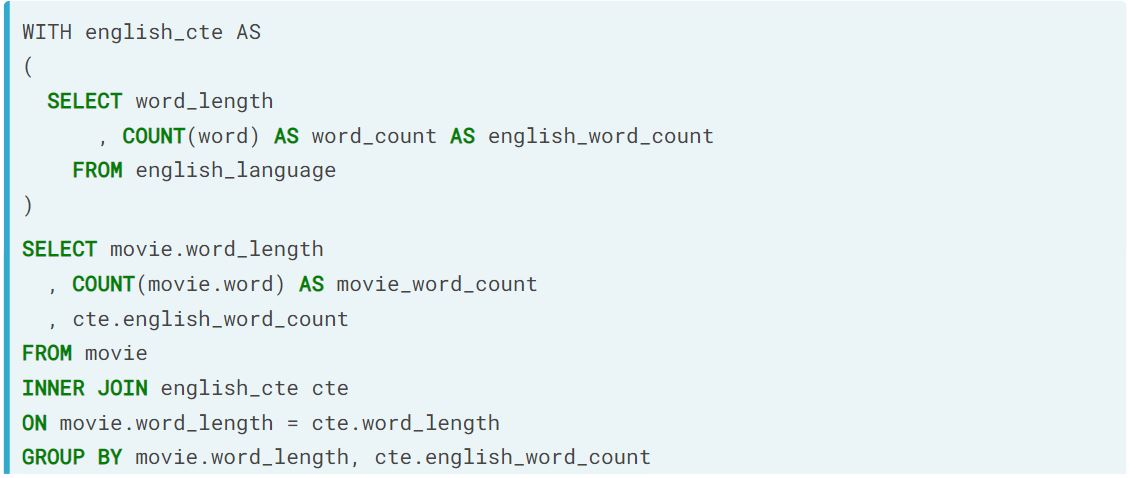

In [13]:
## hidden

### EXERCISEs.
#### Exercise 2.1. Filtering to freezing with a subquery
From the first Olympics in 1904 through the 2016 games, African countries have sent 7,845 athletes. However, only 55 of those athletes competed in the Winter Olympics.

One-quarter of Africa is covered by the Sahara, and the non-desert areas have year-round heat. Perhaps this lack of cold weather and snow limits the training opportunities for Winter Olympians.

Here, you will explore climate data to see if all African countries lack winter sports conditions. The World Bank collects average temperatures and precipitation for each country. Monthly and annual 40-year averages are preloaded with temperature in degrees Celsius (0 is freezing) and precipitation in millimeters.

Examine the **`climate`** data (look at the first 3 lines below), looking for countries below freezing all year. Are there any in Africa?

olympic_cc|region|country|country_code|precip_1|precip_02|precip_03|precip_04|precip_05|precip_06|precip_07|precip_08|precip_09|precip_10|precip_11|precip_12|precip_annual|temp_01|temp_02|temp_03|temp_04|temp_05|temp_06|temp_07|temp_08|temp_09|temp_10|temp_11|temp_12|temp_annual
-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
AFG|Asia|Afghanistan|AFG|43.27564145|49.18457755|64.97141845|49.40662428|24.18248843|4.559184962|8.034325742|7.736402995|3.667419606|9.355273409|15.40912666|31.53937366|311.3218559|0.073058404|2.109406295|7.596974062|13.37023908|18.2163097|23.20131516|25.2585367|23.7665167|19.03457455|12.99264626|7.004094443|2.433516851|12.92145452
ALB|Europe|Albania|ALB|107.9994176|102.6258335|93.43308322|86.16250038|74.27391656|54.57916753|39.07499989|45.69633325|67.56849957|105.2614174|138.2641671|138.2958336|1053.235184|2.023066632|3.218058333|6.035316656|9.917866548|14.44275006|17.92774995|20.53891659|20.47966655|17.15908329|12.265775|7.575808227|3.653616677|11.26980007
ALG|Africa|Algeria|DZA|8.991996859|8.603530758|9.393840894|8.036686549|6.555782698|3.373739663|2.065212531|3.687830136|5.128238813|7.328424389|9.528861018|9.279404498|81.97354877|12.12249731|14.79019474|17.91350279|21.93638156|26.41402801|30.79646789|32.53892062|31.97453911|28.8243092|23.33912251|17.30899544|12.95063616|22.57579114
...|...|...|...|...|...|...|...|...|...|...|...|...|...|...|...|...|...|...|...|...|...|...|...|...|...|...|...|...|...|

#### Instructions
- Limit to `athletes` participating only in the Winter Olympics, using the `season` column.
- Use a `subquery` to select only those countries from the `oclimate` table with an `average` annual temperature (`temp_annual`) below freezing (0 degrees).
- Select the `country codes`, `olympic_cc` from the `oclimate` table to filter the `country_code` from the `athletes` table.

**SOLUTION.**

                    -- Countries cold enough for snow year-round
                    SELECT country_code,
                           country,
                           COUNT (DISTINCT athlete_id) AS winter_athletes -- Athletes can compete in multiple events 
                    FROM athletes
                    WHERE country_code IN (SELECT olympic_cc FROM oclimate WHERE temp_annual < 0)
                      AND season = 'Winter'
                    GROUP BY country_code, country;
**query result.**

country_code|country|winter_athletes
:-|:-|:-:
CAN|Canada|217
MGL|Mongolia|2
RUS|Russia|213

**Comment.** The `subquery` provided a dynamic filter for all `average below freezing countries`. While `climate` is not the whole story, you can see that indeed ***no African countries are consistently below freezing***.

#### Exercise 2.2. Where winter is white
Canada, Russia, and Mongolia are the only countries with Olympians and average annual temperatures below freezing. More commonly, countries have cold weather occurring only during winter months. Countries with only a few months of freezing temperatures and snow still provide athletes the opportunity to train for events like skiing and bobsledding.

With this in mind, you will look at climate data for countries with Olympic athletes using the 40-year average monthly temperatures. You are really intrigued by the low Winter Olympics participation in Africa and decide to look at the temperature for all the Olympic regions in the southern hemisphere.

Write the query to optimize for readability by using a `common table expression (CTE)`.

#### Instructions
- Write a `CTE`, `south_cte` for the southern hemisphere.
- Find the `average` June temperature and precipitation from the `oclimate` table.
- Join the results to view the average winter month temperature for all regions.

**SOLUTION.**

                WITH south_cte AS -- CTE
                (
                  SELECT region,
                         ROUND(AVG(temp_06),2) AS avg_winter_temp,
                         ROUND(AVG(precip_06),2) AS avg_winter_precip
                  FROM oclimate
                  WHERE region IN ('Africa','South America','Australia and Oceania')
                  GROUP BY region
                )

                SELECT south.region, south.avg_winter_temp, south.avg_winter_precip,
                       COUNT(DISTINCT ath.athlete_id)
                FROM south_cte as south
                INNER JOIN athletes_recent ath
                     ON (south.region = ath.region)
                       AND (ath.season = 'Winter')
                GROUP BY south.region, south.avg_winter_temp, south.avg_winter_precip
                ORDER BY south.avg_winter_temp;

**query result.**

region|avg_winter_temp|avg_winter_precip|count
:-|:-:|:-:|:-:
South America|18.50|156.23|31
Australia and Oceania|19.87|137.92|76
Africa|23.99|73.98|5

**Comments** The `CTE structure` made the query easy to follow and did not slow performance. June in `Africa` has an average temperature of 24 degrees, well above the 0 degrees freezing point when snow forms.

#### Exercise 2.3. Countries with subqueries or CTEs
Of the Olympic regions, Africa has the warmest winters. However, some African countries do participate in the Winter Olympics. For instance, Morocco has sent more than 20 athletes over the years. Perhaps looking at the data at the regional level is too broad. Maybe some African countries have colder winters than other African countries.

Take another look at winter climate data, but look on a country level. The athletes have been filtered down to include only African athletes, with the first African Olympians competing in 1960.

Use both a subquery and `CTE` structure and compare the results.

#### Instructions 
**Step 1.** Use the `country_code` and `athletes_wint` table to write a `subquery` to limit results to African countries with athletes.

**SOLUTION.**

                    -- Climate by country with Olympian athletes
                    SELECT country,
                           temp_06,
                           precip_06
                    FROM climate
                    WHERE region = 'Africa'
                    AND olympic_cc IN (SELECT DISTINCT country_code FROM athletes_wint)
                    ORDER BY temp_06;

**query result.**

country|temp_06|precip_06
:-|:-:|:-:
South Africa|11.16237712|15.42496017
Swaziland|15.72179985|9.836660002
Zimbabwe|15.79461769|3.666232399
Madagascar|19.34973597|48.24088787
Morocco|22.22089738|8.181283134
Ethiopia|23.26252847|76.85980415
Kenya|23.41749186|34.48872359
Cameroon|24.33604766|170.7240811
Togo|26.00722218|169.0544451
Ghana|26.61422073|183.7197402
Egypt|28.82016301|1.837291792
Senegal|30.10729419|68.75763665
Algeria|30.79646789|3.373739663

**Step 2.** Use the same `climate` as in the `subquery` step to look at June temperatures and precipitation in a `CTE`.

**SOLUTION.**

                    WITH countries_cte AS -- CTE
                    (
                        SELECT olympic_cc, country,
                               temp_06, precip_06
                        FROM climate
                        WHERE region = 'Africa'
                    )

                    SELECT DISTINCT cte.country, cte.temp_06, cte.precip_06
                    FROM athletes_wint AS wint
                    INNER JOIN countries_cte AS cte
                      ON wint.country_code = cte.olympic_cc
                    ORDER BY temp_06;

**query result.**

country|temp_06|precip_06
:-|:-:|:-:
South Africa|11.16237712|15.42496017
Swaziland|15.72179985|9.836660002
Zimbabwe|15.79461769|3.666232399
Madagascar|19.34973597|48.24088787
Morocco|22.22089738|8.181283134
Ethiopia|23.26252847|76.85980415
Kenya|23.41749186|34.48872359
Cameroon|24.33604766|170.7240811
Togo|26.00722218|169.0544451
Ghana|26.61422073|183.7197402
Egypt|28.82016301|1.837291792
Senegal|30.10729419|68.75763665
Algeria|30.79646789|3.373739663

**Comments.** Most `queries` can be structured as a `subquery` or a `CTE`. In this example, a `CTE` would be a better option than a `subquery` if the `climate` table was large and slow to `query`. Because the `climate` table was actually small, the `subquery` provided a more succinct and readable `query`.

## 3. Working with temporary tables
### About `temp` tables
- **What?** A `temporary` tables or shortly `temp` table; is a **short-lived** table.
- **Why?** Transient storage; database season; multiple queries; user specific; and slow table.
- **How?** Syntax: 

                        CREATE TEMP TABLE tab_name AS (...);
**Structure**                        

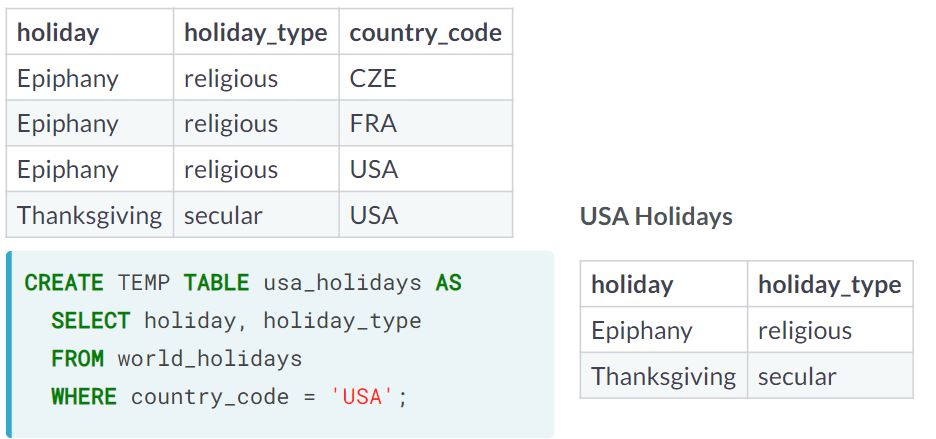

In [14]:
## hidden

### Why slow table?
Since they contain a large values with many records; such as

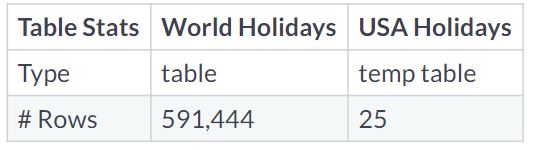

In [15]:
## hidden

#### Complicated views

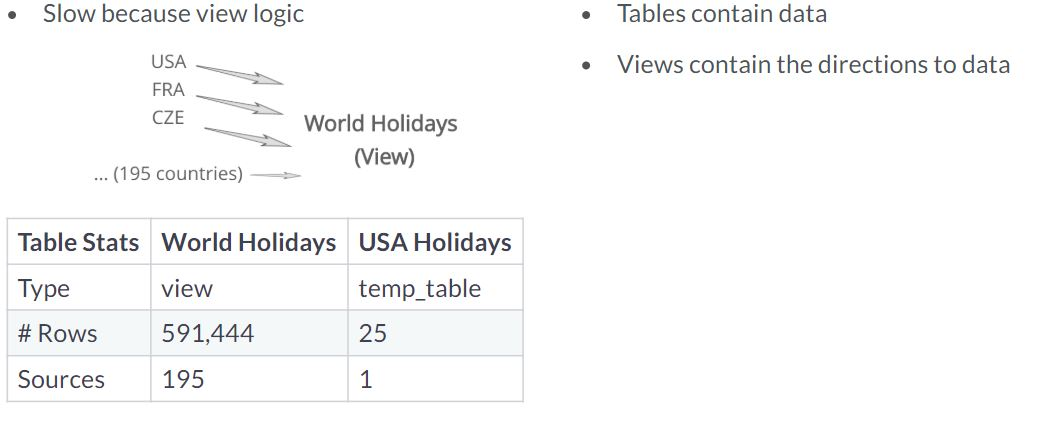

In [16]:
## hidden

#### Joining many tables to one.

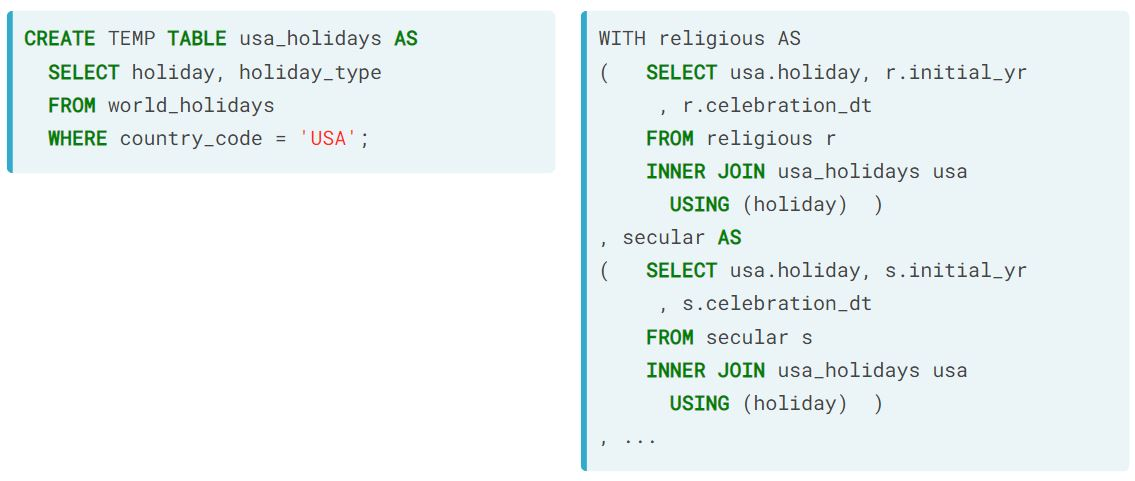

In [17]:
## hidden

#### Analyze.

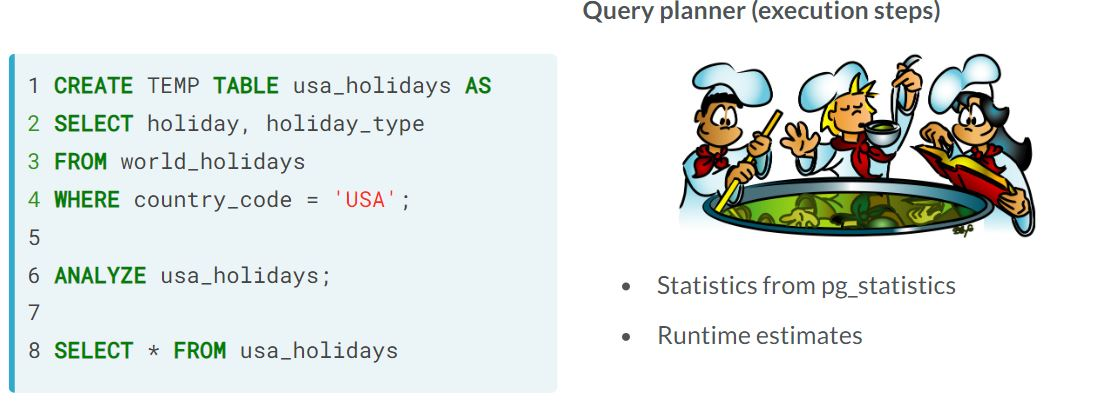

In [18]:
## hidden

### EXERCISE
#### Exercise 4.1. Canadians temp table
You are interested in the Winter Olympics and want to look at athletes from countries with a winter climate (cold temperatures and snowfall). You know Canada has an average annual temperature below freezing, so you decide to look at Canadian athletes. You want to know all the winter sports that Canadians participate in and which sport has the most Canadian competitors.

The preloaded base table of Olympic athletes, **`athletes_recent`**, is quite large. Even though it only includes athletes from two Olympic games, it has thousands of rows and could be slow to `query`.

Since you want to look at Canadian athletes only and then perform some exploratory analysis, you will first create a temporary table of Canadian athletes. Use this table to find the sport with the most athletes.

#### Instructions.
- Create a `temp table` of the Canadian athletes from the `athletes_recent` table.
- Choose only athletes in the Winter Olympics.
- Use the canadians `temp table` to find the sport with the most Canadian competitors.

**SOLUTION.**

                -- Create a temp table of Canadians
                CREATE TEMP TABLE canadians AS(
                                                SELECT *
                                                FROM athletes_recent
                                                WHERE country_code = 'CAN'
                                                AND season = 'Winter'); -- The table has both summer and winter athletes

                -- Find the most popular sport
                SELECT sport, 
                       COUNT(DISTINCT athlete_id) as no_athletes
                FROM canadians
                GROUP BY sport 
                ORDER BY no_athletes DESC;
                
**query result.**

sport|no_athletes
:-|:-:
Ice Hockey|44
Freestyle Skiing|26
Snowboarding|24
Bobsleigh|18
Speed Skating|17
Figure Skating|17
Alpine Skiing|15
Cross Country Skiing|13
Short Track Speed Skating|9
Curling|8
Luge|8
Biathlon|8
Ski Jumping|6
Skeleton|4

**Comments.** Creating a Canadian winter athletes table meant the `query` planner only had to search 359 records instead of the 18,579 records in the `athletes` table in order to find that ice hockey has the most `Canadian Olympic athletes`.

#### Exercise 4.2. Analyze that temp table
Athletes qualify for the Olympics through hard work and dedication. 

However, some `factors`, like the `climate of the athlete's home country`, do have an impact. You want to dive deeper into these relationships by creating a list of all countries with Olympians and examining country demographics.

You have access to the table `athletes`, but it has thousands of entries, making it slow to query. One solution is to create a temporary table of all country codes. You can then analyze statistics related to country characteristics using the `temporary table`, which allow the query planner to `optimize the query execution better`.

#### Instructions
- Create a `TEMP TABLE` called `countries`.
- Allow the query planner to collect statistics on the table.
- Count all entries in the newly created table.

**SOLUTION.**

                    -- Create temp countries table
                    CREATE TEMP TABLE countries AS
                                SELECT DISTINCT o.region, a.country_code, o.country
                                FROM athletes a
                                INNER JOIN oregions o
                                  ON a.country_code = o.olympic_cc;

                    ANALYZE countries; -- Collect the statistics

                    -- Count the entries
                    SELECT COUNT(*) FROM countries;
**query result.**

count|
-----|
205 |

**Comments.** Nice job using `temp tables` and giving the `query planner` that extra information with the `ANALYZE` function! We will now learn other ways to limit the database load and relate your `SQL instructions` to the `query execution`.